In [28]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from matplotlib_venn import venn3
from venn import venn
import seaborn as sns
sns.set(font_scale=2)
%matplotlib inline

from utils import prepare_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
df = prepare_df(droprows=['delivery_type_id', 'predict_automatch', 'country_id_n'])
df.head()

,period_end_date,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
2,2020-09-20 00:00:00+00:00,2020-09-23 12:27:51+00:00,0,426,121.0,42730.0,2,30,37,1.0,1
3,2020-09-20 00:00:00+00:00,2020-09-23 12:26:41+00:00,0,426,121.0,42730.0,2,92,203,1.0,1
4,2020-09-20 00:00:00+00:00,2020-09-22 09:40:36+00:00,0,426,121.0,50128.0,2,9,31,1.0,1
5,2020-09-20 00:00:00+00:00,2020-09-25 15:31:09+00:00,0,426,121.0,19105.0,2,145,205,1.0,1
6,2020-09-20 00:00:00+00:00,2020-09-22 11:18:00+00:00,0,427,108.0,47990.0,1,172,237,1.0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18059 entries, 2 to 19696
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   period_end_date    18059 non-null  datetime64[ns, UTC]
 1   translated_when    18059 non-null  datetime64[ns, UTC]
 2   if_data_corrected  18059 non-null  int64              
 3   prod_gr_id         18059 non-null  int64              
 4   country_id_n       18059 non-null  float64            
 5   delivery_type_id   18059 non-null  float64            
 6   freq_id            18059 non-null  int64              
 7   retailer_id        18059 non-null  int64              
 8   brand_id           18059 non-null  int64              
 9   predict_automatch  18059 non-null  float64            
 10  class_acctual      18059 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(3), int64(6)
memory usage: 1.7 MB


In [13]:
dft = df.set_index('period_end_date')
dft.head()

,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
period_end_date,,,,,,,,,,
2020-09-20 00:00:00+00:00,2020-09-23 12:27:51+00:00,0,426,121.0,42730.0,2,30,37,1.0,1
2020-09-20 00:00:00+00:00,2020-09-23 12:26:41+00:00,0,426,121.0,42730.0,2,92,203,1.0,1
2020-09-20 00:00:00+00:00,2020-09-22 09:40:36+00:00,0,426,121.0,50128.0,2,9,31,1.0,1
2020-09-20 00:00:00+00:00,2020-09-25 15:31:09+00:00,0,426,121.0,19105.0,2,145,205,1.0,1
2020-09-20 00:00:00+00:00,2020-09-22 11:18:00+00:00,0,427,108.0,47990.0,1,172,237,1.0,1


In [14]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18059 entries, 2020-09-20 00:00:00+00:00 to 2020-11-01 00:00:00+00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   translated_when    18059 non-null  datetime64[ns, UTC]
 1   if_data_corrected  18059 non-null  int64              
 2   prod_gr_id         18059 non-null  int64              
 3   country_id_n       18059 non-null  float64            
 4   delivery_type_id   18059 non-null  float64            
 5   freq_id            18059 non-null  int64              
 6   retailer_id        18059 non-null  int64              
 7   brand_id           18059 non-null  int64              
 8   predict_automatch  18059 non-null  float64            
 9   class_acctual      18059 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(3), int64(6)
memory usage: 1.5 MB


In [15]:
dft.columns

Index(['translated_when', 'if_data_corrected', 'prod_gr_id', 'country_id_n',
       'delivery_type_id', 'freq_id', 'retailer_id', 'brand_id',
       'predict_automatch', 'class_acctual'],
      dtype='object')

In [7]:
dft.index

Index([2020-09-20, 2020-09-20, 2020-09-20, 2020-09-20, 2020-09-20, 2020-09-20,
       2020-09-20, 2020-09-20, 2020-09-20, 2020-09-20,
       ...
       2020-11-01, 2020-11-29, 2020-11-01, 2020-11-01, 2020-11-01, 2020-11-01,
       2020-11-01, 2020-11-01, 2020-11-01, 2020-11-01],
      dtype='object', name='period_end_date', length=18059)

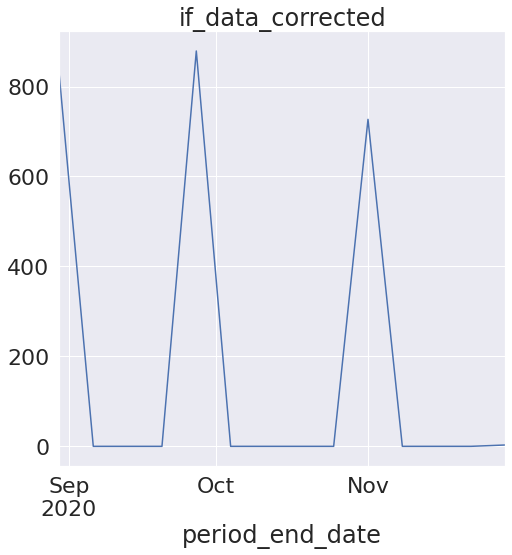

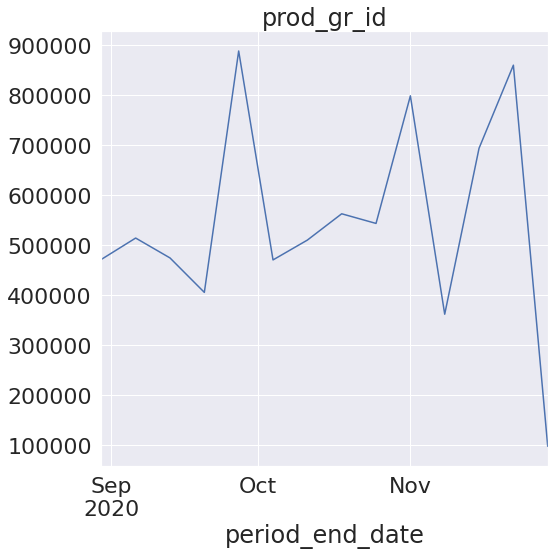

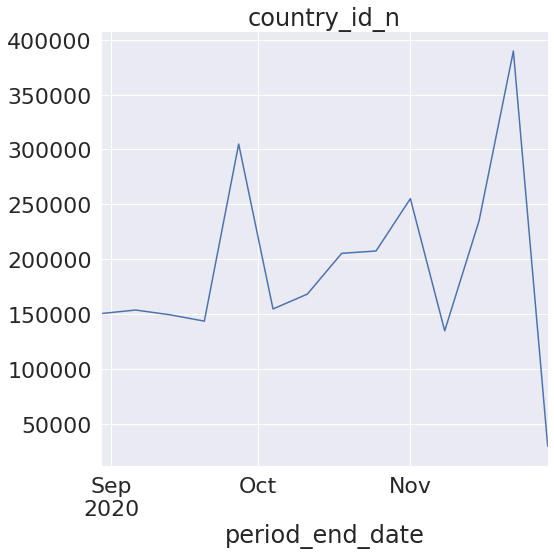

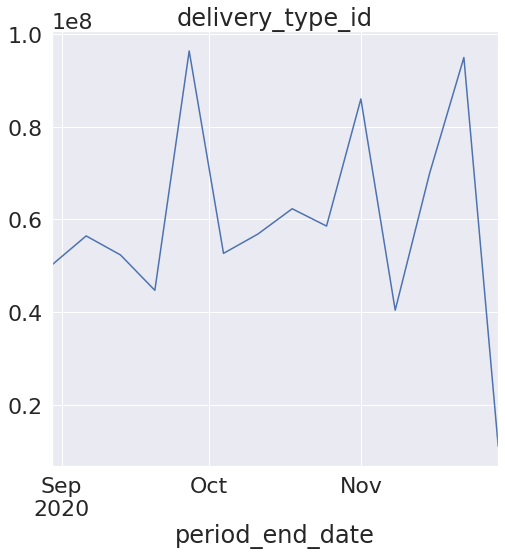

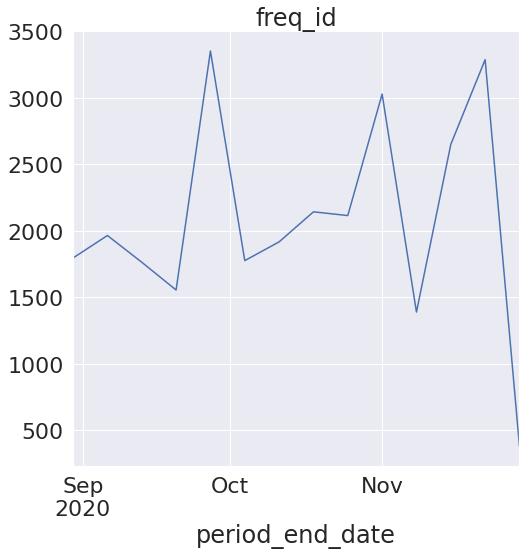

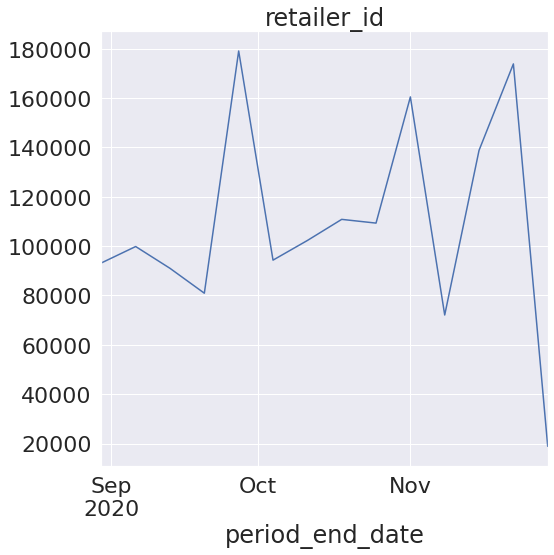

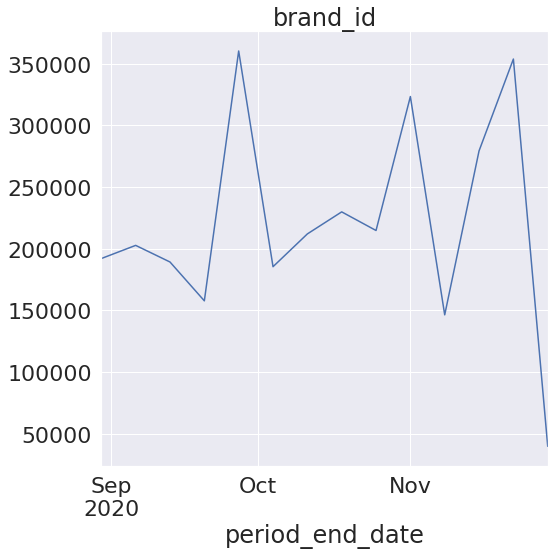

In [37]:
for column in ['if_data_corrected', 'prod_gr_id', 'country_id_n',
       'delivery_type_id', 'freq_id', 'retailer_id', 'brand_id']:
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    ax.set_title(column)
    dft[column].resample('7D').sum().plot(subplots=True, figsize=(4,4), ax=ax)
plt.show()


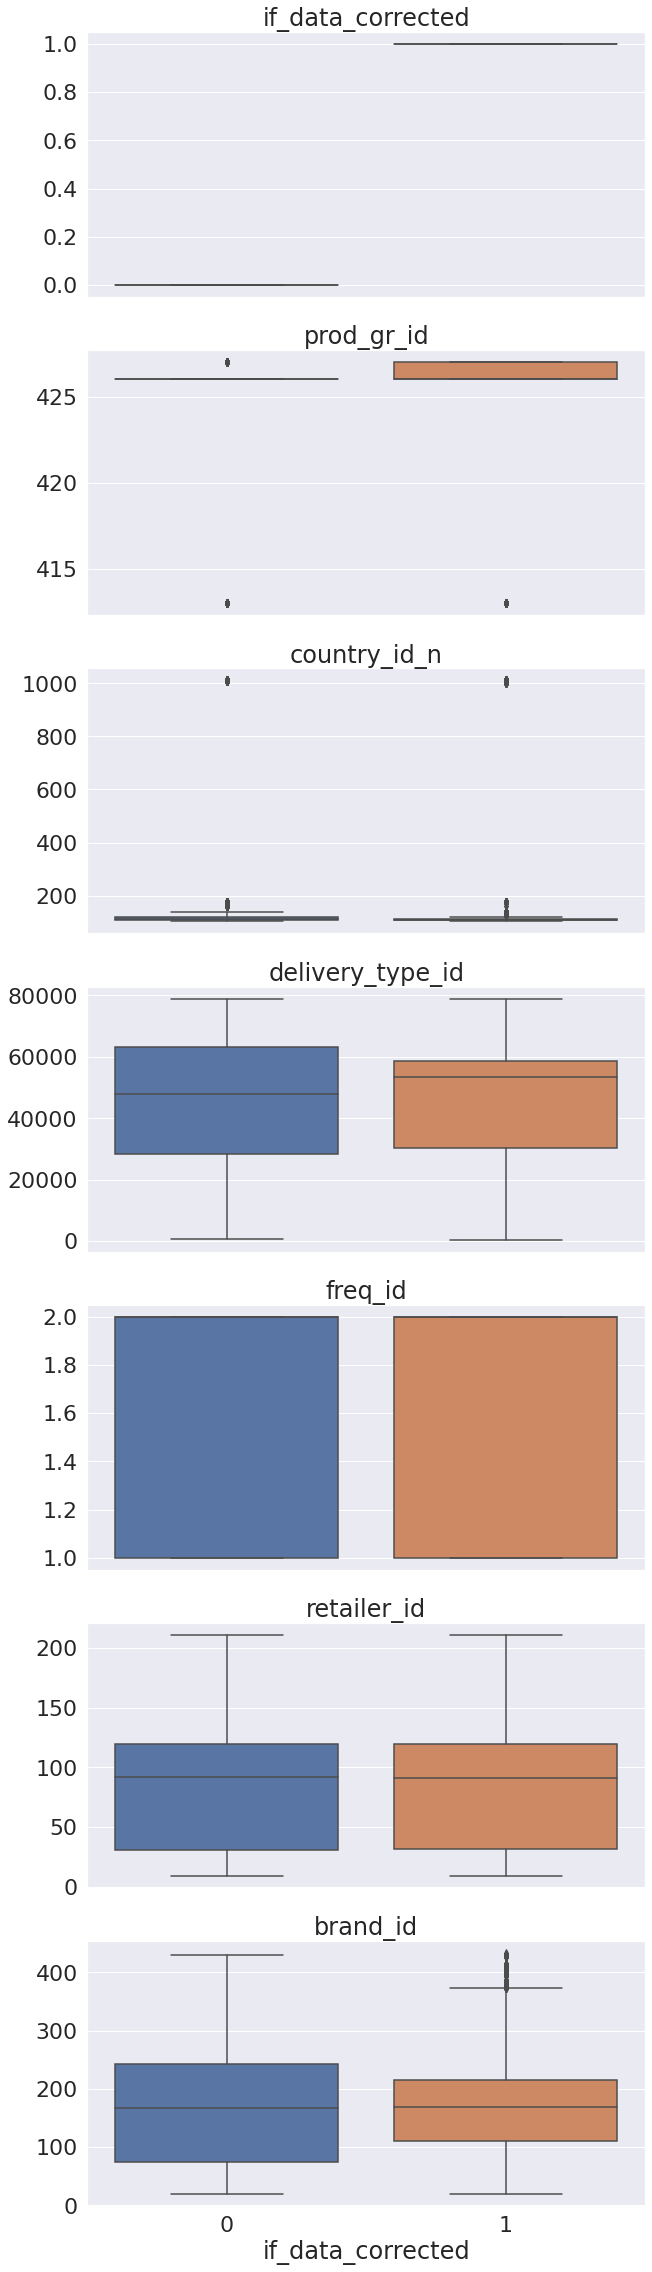

In [42]:
fig, axes = plt.subplots(7, 1, figsize=(10, 40), sharex=True)
for col, ax in zip(['if_data_corrected', 'prod_gr_id', 'country_id_n',
       'delivery_type_id', 'freq_id', 'retailer_id', 'brand_id'], axes):
    sns.boxplot(data=dft, x='if_data_corrected', y=col, ax=ax)
    ax.set_ylabel('')
    ax.set_title(col)

    if ax != axes[-1]:
        ax.set_xlabel('')

<AxesSubplot:xlabel='period_end_date'>

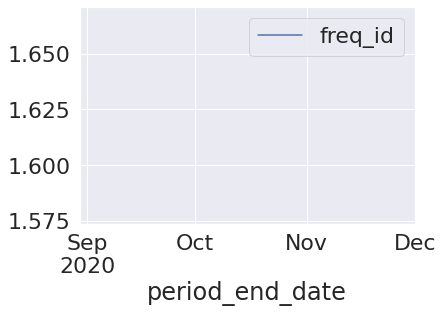

In [35]:
dft.resample('D').mean().plot( y='freq_id')